In [2]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import seaborn as sns

c:\users\mtx\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
house = load_boston()

In [4]:
print(house.DESCR)# 描述信息

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
x = house.data
y = house.target

In [6]:
df = pd.DataFrame(x, columns=house.feature_names)
df['Target'] = pd.DataFrame(y,columns=['Target'])

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


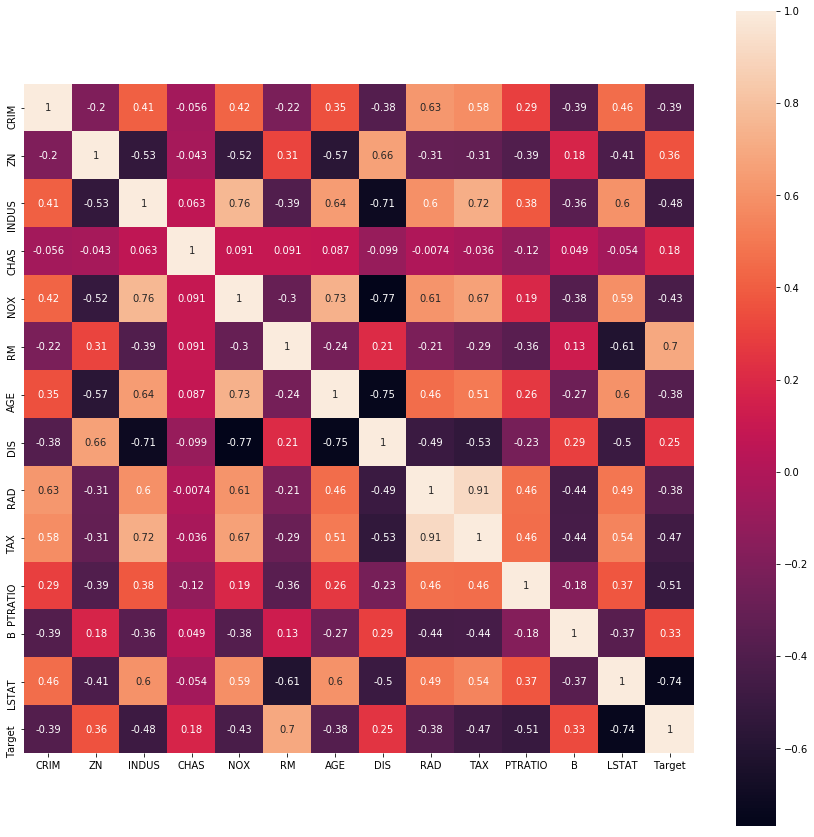

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True, square=True)

In [10]:
#标准化 该处使用z-score 
#其他方法还有：min-max标准化（Min-max normalization），log函数转换，atan函数转换，z-score标准化（zero-mena normalization，此方法最为常用），模糊量化法 
#https://www.jianshu.com/p/fa73a07cd750）
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [11]:
#切分数据
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [12]:
#创建模型 使用Lasso
#为了防止过拟合，以正则化方法来区分，Lasso-L1-系数会为0， Ridge-L2-不放弃任何特征
#（https://blog.csdn.net/pxhdky/article/details/82960659）
model = LassoCV()
model.fit(x_train,y_train)
print(model.alpha_)
print(model.coef_)

0.007109356559101551
[-0.93432779  0.90942045  0.2983212   0.41259105 -2.23952533  2.28977401
  0.71187362 -2.81442598  3.20345313 -2.75004963 -2.65489423  0.54085442
 -4.13935031]


c:\users\mtx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [13]:
model.score(x_test,y_test)

0.6511297723924293